In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf

#from pmdarima import auto_arima


In [3]:
df = pd.read_csv("/workspaces/alternative-time-series-project/sales.csv")

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


Setting up the right date format

In [4]:
df["date"] = pd.to_datetime(df.date)
df = df.set_index("date") # VIP need to set date as INDEX
ts_df = df["sales"]
ts_df.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

/tmp/ipykernel_2084/1964959674.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=smoothed_data, ax=axis, palette="Set1", linewidth=2.5, alpha=0.8)
/tmp/ipykernel_2084/1964959674.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=ts_df, ax=axis, palette="Set1", linewidth=1, linestyle='--', alpha=0.4)


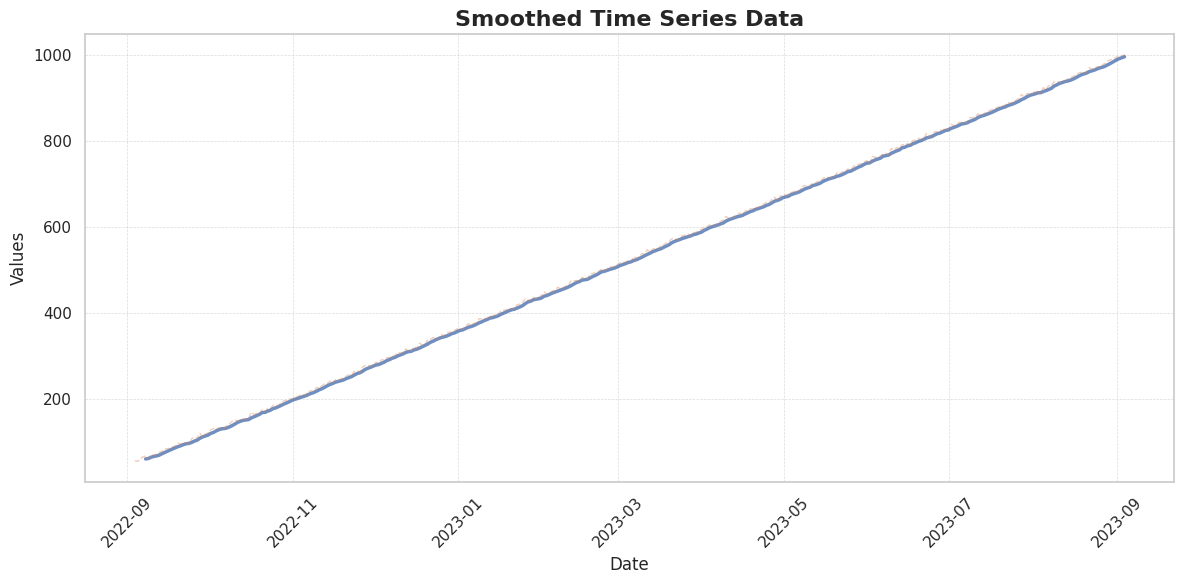

In [5]:
smoothed_data = ts_df.rolling(window=5).mean()

sns.set(style="whitegrid")

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=smoothed_data, ax=axis, palette="Set1", linewidth=2.5, alpha=0.8)

axis.set_title("Smoothed Time Series Data", fontsize=16, fontweight='bold')
axis.set_xlabel("Date", fontsize=12)
axis.set_ylabel("Values", fontsize=12)

plt.xticks(rotation=45)

axis.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

sns.lineplot(data=ts_df, ax=axis, palette="Set1", linewidth=1, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [6]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print("\nPerforming Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.DataFrame({
        'Metric': ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'],
        'Value': dftest[0:4]
    })
    
    critical_values = pd.DataFrame.from_dict(dftest[4], orient='index', columns=['Critical Value'])
    dfoutput = pd.concat([dfoutput, critical_values.reset_index().rename(columns={'index': 'Metric'})])
    
    print(dfoutput.to_string(index=False))
    
    if dftest[1] < 0.05:
        print("\nConclusion: The time series is likely stationary (reject null hypothesis of non-stationarity).")
    else:
        print("\nConclusion: The time series is likely non-stationary (fail to reject null hypothesis of non-stationarity).")
    
    return dfoutput

test_stationarity(ts_df)


Performing Dickey-Fuller Test:
                     Metric      Value  Critical Value
             Test Statistic   0.545414             NaN
                    p-value   0.986190             NaN
                 #Lags Used  13.000000             NaN
Number of Observations Used 352.000000             NaN
                         1%        NaN       -3.449065
                         5%        NaN       -2.869786
                        10%        NaN       -2.571163

Conclusion: The time series is likely non-stationary (fail to reject null hypothesis of non-stationarity).


,Metric,Value,Critical Value
0,Test Statistic,0.545414,NaN
1,p-value,0.986190,NaN
2,#Lags Used,13.000000,NaN
3,Number of Observations Used,352.000000,NaN
0,1%,NaN,-3.449065
1,5%,NaN,-2.869786
2,10%,NaN,-2.571163


In [7]:
decomposition = seasonal_decompose(ts_df)
decomposition

Trend Analysis

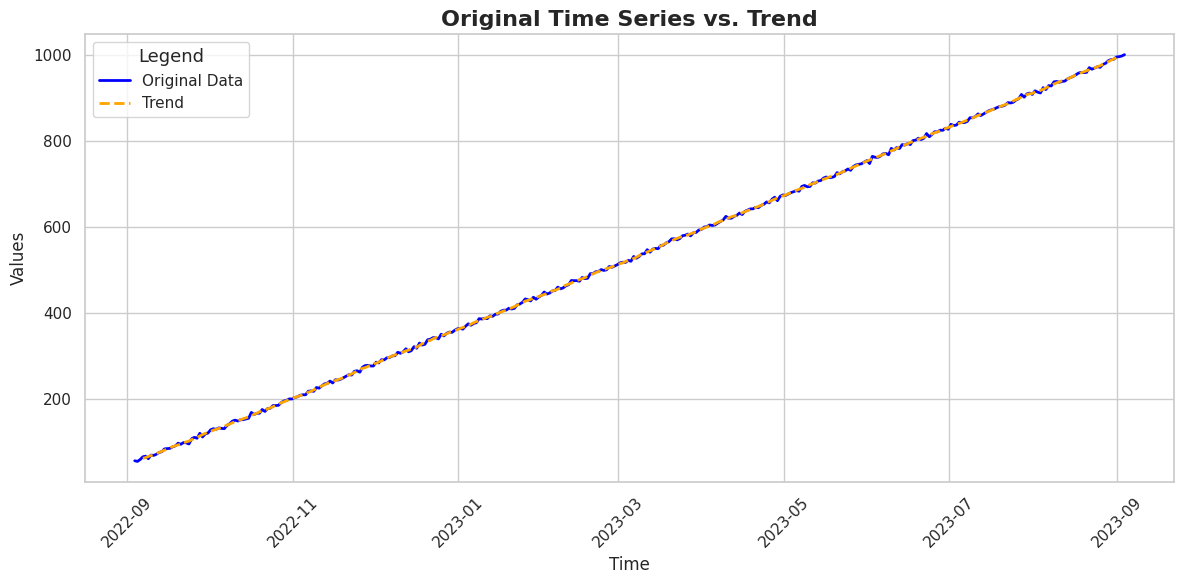

In [8]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts_df, ax=axis, label="Original Data", color="blue", linewidth=2)

sns.lineplot(data=trend, ax=axis, label="Trend", color="orange", linewidth=2, linestyle='--')

axis.set_title("Original Time Series vs. Trend", fontsize=16, fontweight='bold')
axis.set_xlabel("Time", fontsize=12)
axis.set_ylabel("Values", fontsize=12)

plt.xticks(rotation=45)

axis.legend(title="Legend", title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

Shows a clear upward trend

Seasonality Analysis

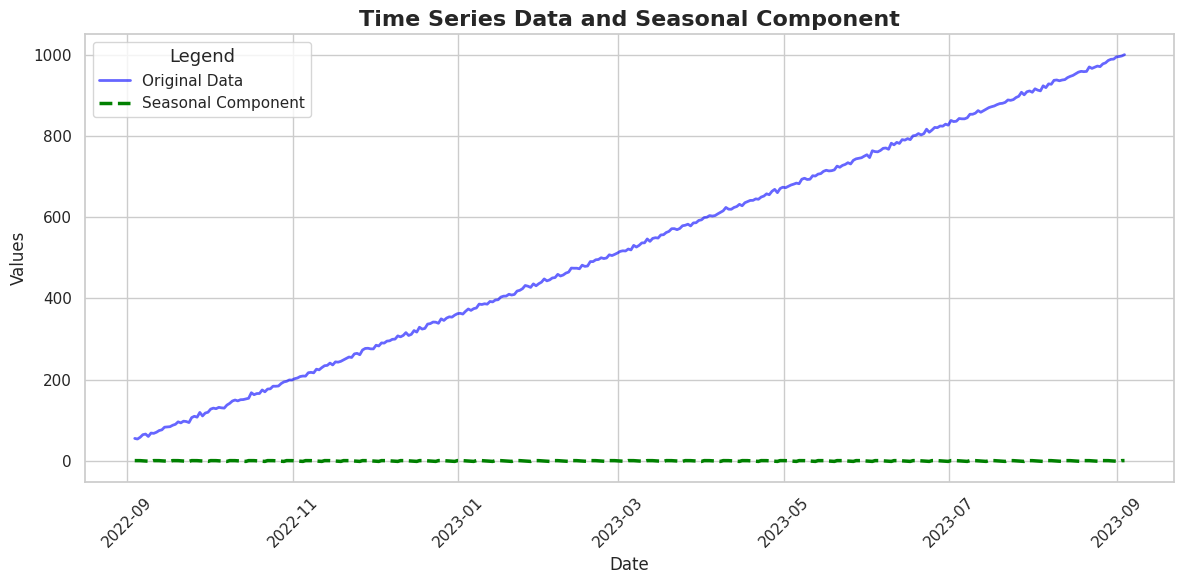

In [9]:
seasonal = decomposition.seasonal

sns.set(style="whitegrid")

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts_df, ax=axis, label='Original Data', color='blue', linewidth=2, alpha=0.6)

sns.lineplot(data=seasonal, ax=axis, label='Seasonal Component', color='green', linewidth=2.5, linestyle='--')

axis.set_title("Time Series Data and Seasonal Component", fontsize=16, fontweight='bold')
axis.set_xlabel("Date", fontsize=12)
axis.set_ylabel("Values", fontsize=12)

axis.legend(title="Legend", title_fontsize='13', fontsize='11')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

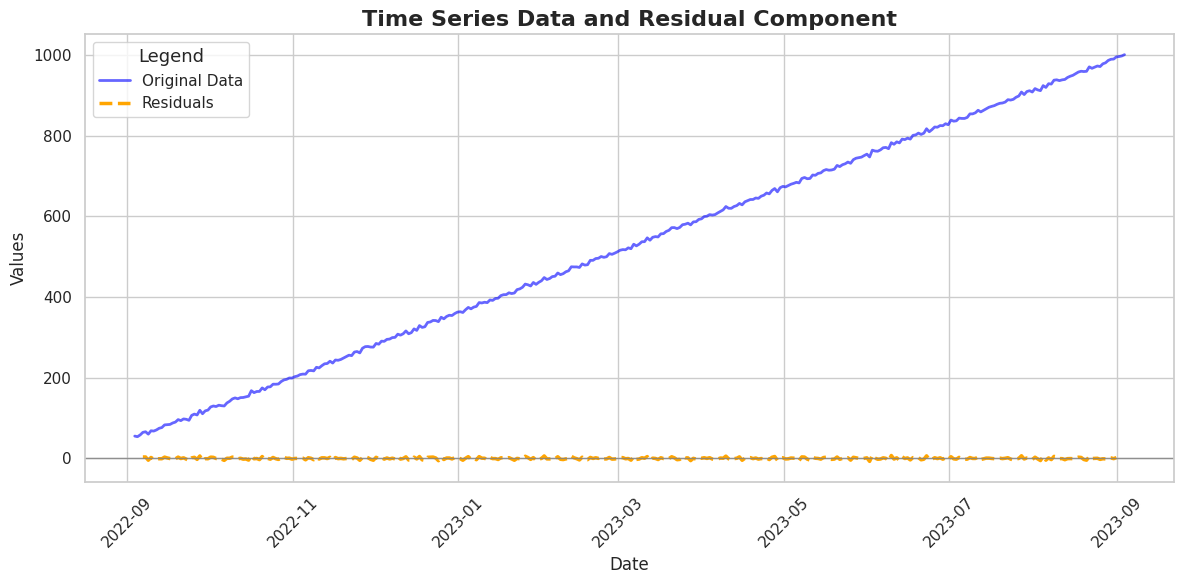

In [10]:
residual = decomposition.resid

sns.set(style="whitegrid")

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts_df, ax=axis, label='Original Data', color='blue', linewidth=2, alpha=0.6)

sns.lineplot(data=residual, ax=axis, label='Residuals', color='orange', linewidth=2.5, linestyle='--')

axis.axhline(0, color='gray', linestyle='-', linewidth=1, alpha=0.8)

axis.set_title("Time Series Data and Residual Component", fontsize=16, fontweight='bold')
axis.set_xlabel("Date", fontsize=12)
axis.set_ylabel("Values", fontsize=12)

axis.legend(title="Legend", title_fontsize='13', fontsize='11')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

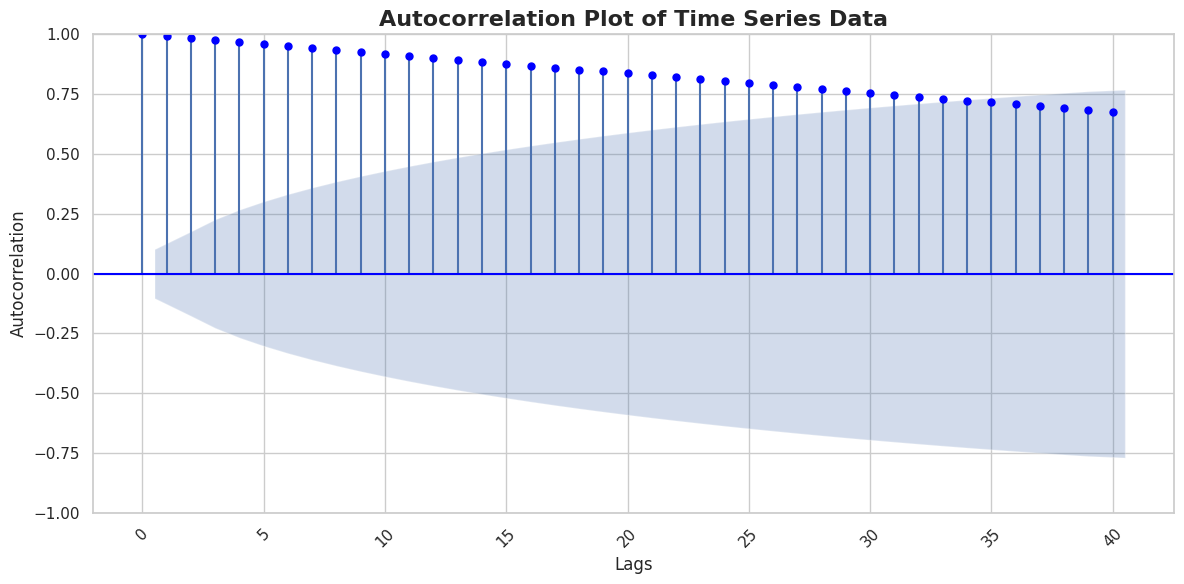

In [11]:
sns.set(style="whitegrid")

fig, axis = plt.subplots(figsize=(12, 6))

plot_acf(ts_df, ax=axis, lags=40, alpha=0.05, color='blue')

axis.set_title("Autocorrelation Plot of Time Series Data", fontsize=16, fontweight='bold')
axis.set_xlabel("Lags", fontsize=12)
axis.set_ylabel("Autocorrelation", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

ARIMA (AutoRegressive Integrated Moving Average) Model

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
result = adfuller(ts_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


In [14]:
ts_diff = ts_df.diff().dropna()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

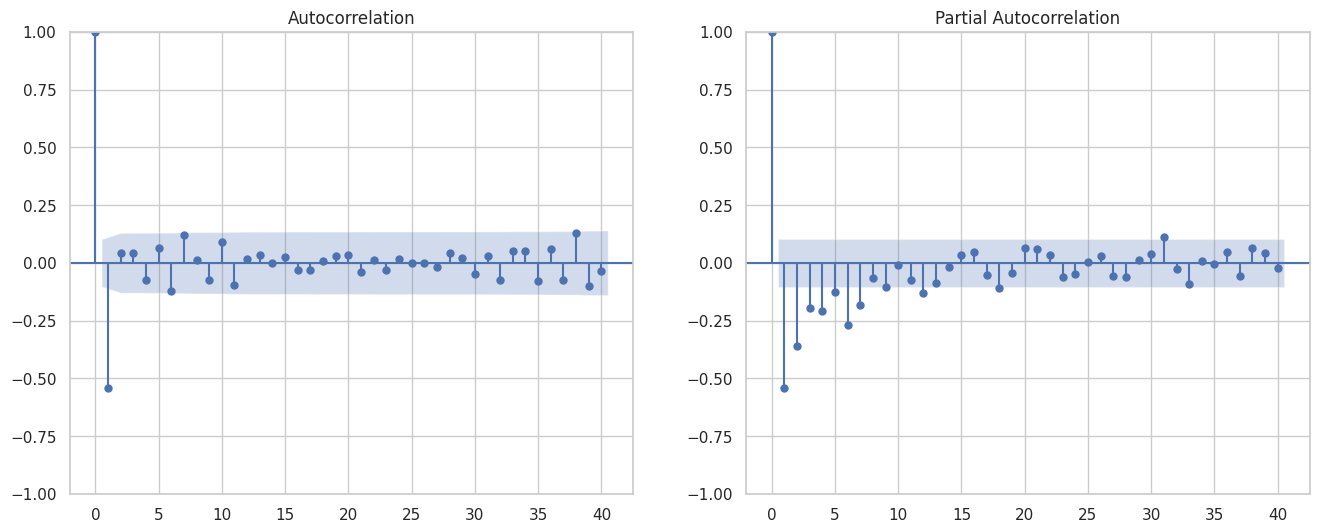

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(ts_df.diff().dropna(), lags=40, ax=ax[0])
plot_pacf(ts_df.diff().dropna(), lags=40, ax=ax[1])
plt.show()

In [17]:
#!pip install intertools
import itertools
import warnings

In [18]:
p = range(0, 4)  # Autoregressive term (p)
d = range(0, 2)  # Differencing term (d)
q = range(0, 4)  # Moving average term (q)

pdq = list(itertools.product(p, d, q))

# Grid search
aic_values = []
for param in pdq:
    try:
        model = ARIMA(ts_df, order=param)
        model_fit = model.fit()
        aic_values.append((param, model_fit.aic))
    except:
        continue

# Find the parameters with the lowest AIC
best_params = sorted(aic_values, key=lambda x: x[1])[0]
print(f"Best parameters: {best_params[0]} with AIC: {best_params[1]}")

/workspaces/alternative-time-series-project/myceb/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-project/myceb/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-project/myceb/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-project/myceb/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-

Best parameters: (2, 0, 2) with AIC: 12.0


/workspaces/alternative-time-series-project/myceb/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
from pmdarima import auto_arima

# Automatically determine p, d, q
auto_model = auto_arima(ts_df, seasonal=False, trace=True, 
                        suppress_warnings=True, stepwise=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.991 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
M

Predict with Test Set

In [22]:
forecast = auto_model.predict(60)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217254
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206409
2023-09-15 17:10:08.079328    1030.804240
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
2023-09-24 17:10:08.079328    1054.184719
2023-09-25 17:10:08.079328    1056.782550
2023-09-26 17:10:08.079328    1059.380381
2023-09-27 17:10:08.079328    1061

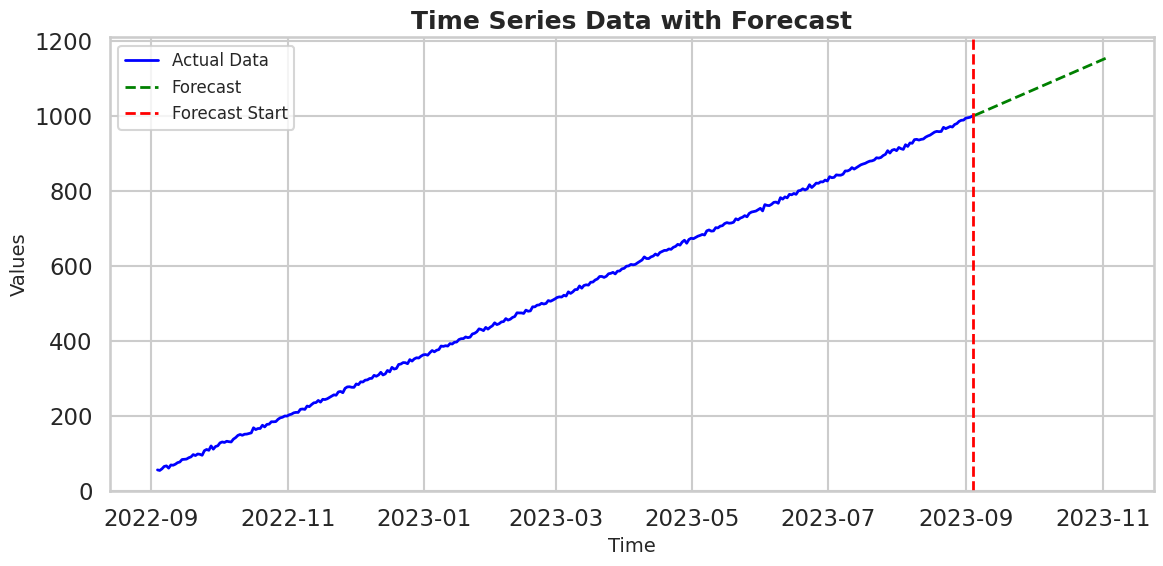

In [23]:
sns.set_style("whitegrid")
sns.set_context("talk")

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts_df, ax=axis, label="Actual Data", color="blue", linewidth=2)

sns.lineplot(data=forecast, ax=axis, label="Forecast", color="green", linestyle="--", linewidth=2)

axis.set_title("Time Series Data with Forecast", fontsize=18, fontweight='bold')
axis.set_xlabel("Time", fontsize=14)
axis.set_ylabel("Values", fontsize=14)

plt.axvline(x=ts_df.index[-1], color='red', linestyle='--', linewidth=2, label='Forecast Start')

axis.legend(loc="upper left", fontsize=12)

plt.tight_layout()

plt.show()